 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [67]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [68]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_data = pd.read_csv(whale_returns_csv)
whale_returns_data.shape
whale_returns_data.head()
whale_returns_data.count()

Date                           1060
SOROS FUND MANAGEMENT LLC      1059
PAULSON & CO.INC.              1059
TIGER GLOBAL MANAGEMENT LLC    1059
BERKSHIRE HATHAWAY INC         1059
dtype: int64

In [69]:
# Count nulls
whale_returns_data.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [70]:
# Drop nulls
whale_returns_data = whale_returns_data.dropna()
whale_returns_data.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [71]:
# Date as Index and drop old date column 
whale_returns_data.set_index(pd.to_datetime(whale_returns_data['Date'],infer_datetime_format=True),inplace=True)
whale_returns_data.drop(columns=['Date'],inplace=True)
whale_returns_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [72]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_data = pd.read_csv(algo_returns_csv)
algo_returns_data.head()
algo_returns_data.count()

Date      1241
Algo 1    1241
Algo 2    1235
dtype: int64

In [73]:
# Count nulls
algo_returns_data.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [74]:
# Drop nulls
algo_returns_data = algo_returns_data.dropna()
algo_returns_data.isnull().sum()

Date      0
Algo 1    0
Algo 2    0
dtype: int64

In [75]:
# Set Date as Index 
algo_returns_data.set_index(pd.to_datetime(algo_returns_data['Date'], infer_datetime_format=True),inplace=True)
algo_returns_data.drop(columns=['Date'], inplace=True)
algo_returns_data.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [76]:
algo_returns_data.columns

Index(['Algo 1', 'Algo 2'], dtype='object')

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [77]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_data = pd.read_csv(sp500_history_csv)
sp500_history_data.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [78]:
# Check Data Type 
sp500_history_data['Close'].head()

0    $2933.68
1    $2907.97
2    $2905.03
3    $2900.45
4    $2907.06
Name: Close, dtype: object

In [79]:
# Fix Data Types 
sp500_history_data['Close'] = sp500_history_data['Close'].str.replace('$','')
sp500_history_data['Close']

0       2933.68
1       2907.97
2       2905.03
3       2900.45
4       2907.06
         ...   
1644    1460.93
1645    1461.40
1646    1450.99
1647    1445.75
1648    1444.49
Name: Close, Length: 1649, dtype: object

In [80]:
# Change to Float 
sp500_history_data['Close'] = sp500_history_data['Close'].astype('float')
sp500_history_data['Close'].dtype

dtype('float64')

In [81]:
# Rename Column
sp500_history_data.set_index(pd.to_datetime(sp500_history_data['Date'], infer_datetime_format=True),inplace=True)
sp500_history_data.drop(columns=['Date'], inplace=True)
sp500_history_data.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


<AxesSubplot:xlabel='Date'>

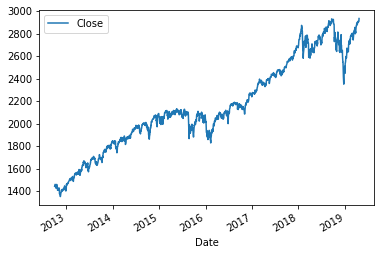

In [82]:
# Plot Daily Returns
sp500_history_data.plot()

In [90]:
# Calculate using pct_change 
sp500_returns = sp500_history_data.pct_change()
sp500_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


<AxesSubplot:xlabel='Date'>

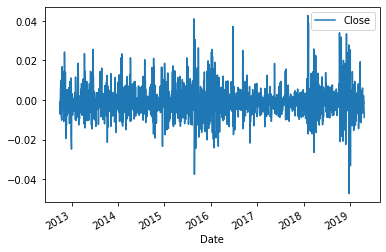

In [91]:
# Plot Daily Returns
sp500_returns.plot()

In [92]:
print(whale_returns_data.head())
print(algo_returns_data.head())
print(sp500_returns.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-03                  -0.001266           -0.004981   
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
Date                                                             
2015-03-03                    -0.000496               -0.006569  
2015-03-04                    -0.002534                0.004213  
2015-03-05                     0.002355                0.006726  
2015-03-06                    -0.008481               -0.013098  
2015-03-09                     0.005843               -0.001652  
              Algo 1    Algo 2
Date                          
2014-06-05  0.004062  0.013285
2014-06-06  0.001

## Combine Whale, Algorithmic, and S&P 500 Returns

In [95]:
# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat([whale_returns_data, algo_returns_data, sp500_returns], axis='columns',join='inner')
combined_data.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

<AxesSubplot:xlabel='Date'>

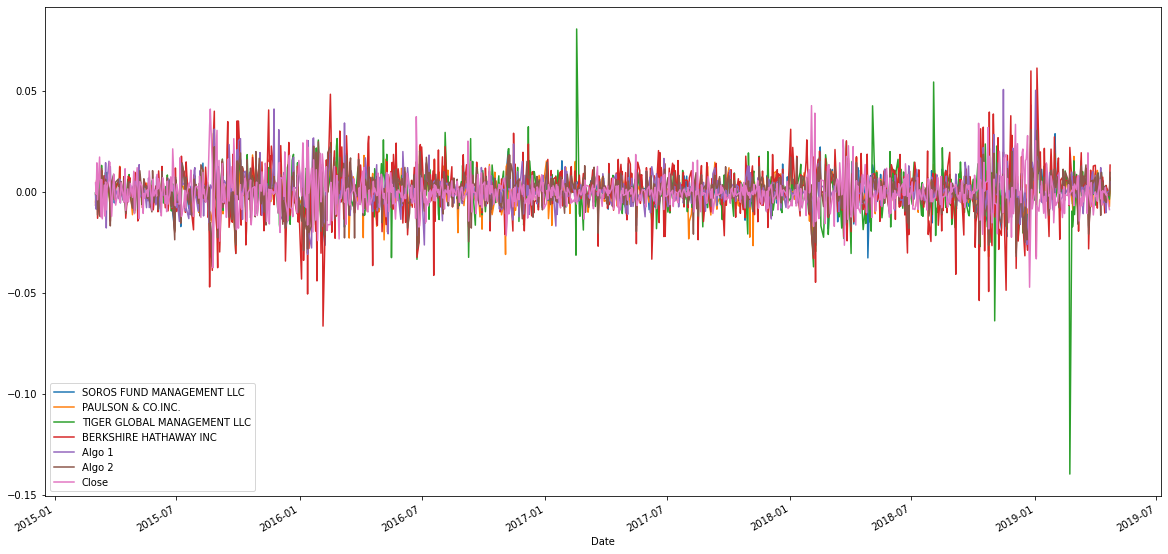

In [96]:
combined_data.plot(figsize=(20,10))

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

In [97]:
# Plot daily returns
portfolio_daily_returns = combined_data.pct_change()
portfolio_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381,3.422374,-3.544766,-1.271027
2015-03-05,0.800968,0.257544,-1.929234,0.596558,-0.888803,0.789231,-13.035127
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282,4.190043,-3.650914,-1.273267
2015-03-09,-1.073656,-2.182252,-1.688907,-0.873840,0.098917,-1.113716,-5.391499


<AxesSubplot:xlabel='Date'>

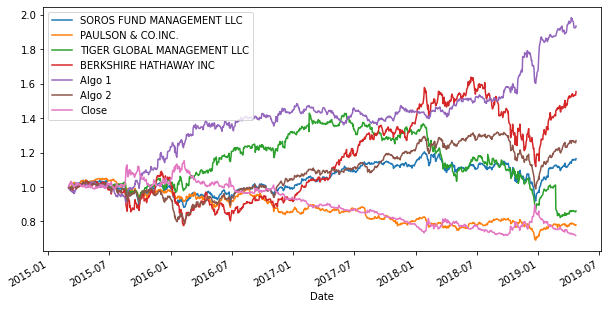

In [98]:
# Plot cumulative returns
cumulative_returns = (1+combined_data).cumprod()
cumulative_returns.head()
cumulative_returns.plot(figsize=(10,5))

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

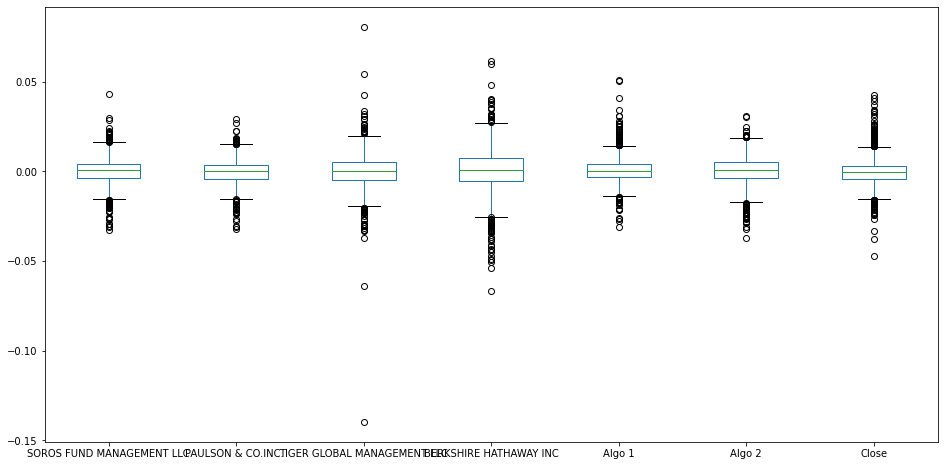

In [99]:
# Box plot to visually show risk
combined_data.plot.box(figsize=(16,8))

In [100]:
combined_data.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
Close                          0.008587
dtype: float64

In [102]:
riskier_sp500 = combined_data["Close"].std()
combined_data.std()>riskier_sp500

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
Close                          False
dtype: bool

In [104]:
combined_data.std() * np.sqrt(252)

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
Close                          0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

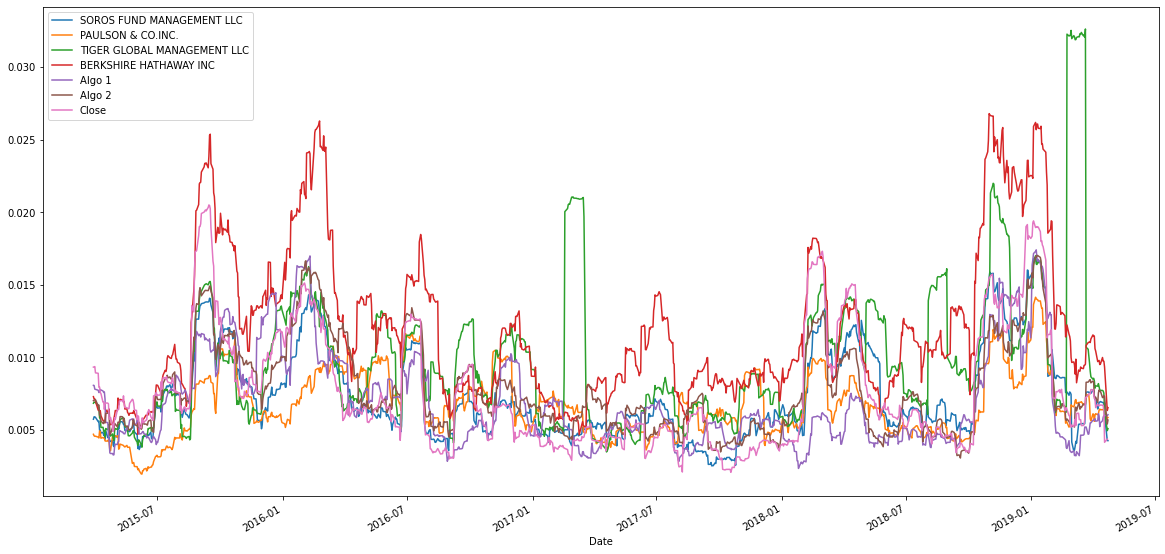

In [112]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
rolling_portfolios = combined_data.rolling(window=20).std().plot(figsize=(20,10))

<AxesSubplot:xlabel='Date'>

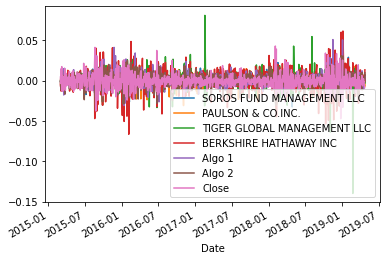

In [113]:
# Correlation
combined_data.plot()

In [115]:
correlation = combined_data.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.000574
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,-0.001505
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,-0.013856
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,-0.033963
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,-0.002192
Close,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

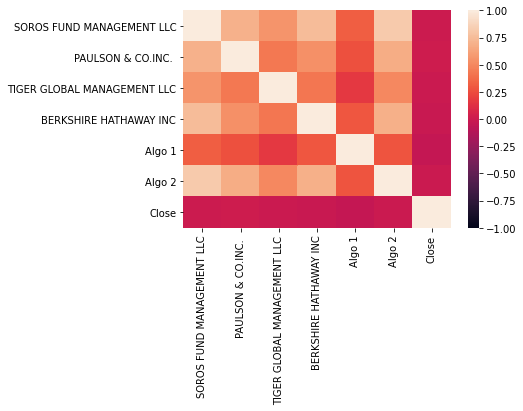

In [116]:
import seaborn as sns
correlation = combined_data.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)

In [118]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
covariance = combined_data['Algo 1'].cov(combined_data['Close'])
covariance

-2.2230425517155273e-06

In [119]:
variance = combined_data['Close'].var()
variance

7.373467552840441e-05

In [194]:
algo_1_beta = covariance / variance
algo_1_beta

1.7098814915180172

In [ ]:
rolling_covariance = portfolio_daily_returns['Algo 1'].rolling(window=60).cov(portfolio_daily_returns['Close'])
rolling_covariance.plot(figsize=(20,10), title = "Rolling 60-Day Covariance 'Algo 1'")

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [24]:
# (OPTIONAL) YOUR CODE HERE

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [25]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

In [26]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Read the first stock
# YOUR CODE HERE

In [28]:
# Read the second stock
# YOUR CODE HERE

In [29]:
# Read the third stock
# YOUR CODE HERE

In [30]:
# Concatenate all stocks into a single DataFrame
# YOUR CODE HERE

In [31]:
# Reset the index
# YOUR CODE HERE

In [33]:
# Drop Nulls
# YOUR CODE HERE

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [34]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
# YOUR CODE HERE

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [35]:
# YOUR CODE HERE

In [36]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
# YOUR CODE HERE

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [37]:
# Risk
# YOUR CODE HERE

In [38]:
# Rolling
# YOUR CODE HERE

In [39]:
# Beta
# YOUR CODE HERE

In [40]:
# Annualzied Sharpe Ratios
# YOUR CODE HERE

In [41]:
# Visualize the sharpe ratios as a bar plot
# YOUR CODE HERE

## Include correlation analysis to determine which stocks (if any) are correlated

In [42]:
# YOUR CODE HERE